In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/패캠_파이톤/contents/netflix.csv')
disney = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/패캠_파이톤/contents/disney.csv')

Mounted at /content/drive


# **Checking Data**

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


# **Cleaning Data**

In [5]:
# Checking the missing data
for i in netflix.columns :
    missingValueRate = netflix[i].isna().sum() / len(netflix) * 100
    if missingValueRate > 0 :
        print("{} null rate: {}%".format(i,round(missingValueRate, 2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [6]:
for i in disney.columns :
    missingValueRate = disney[i].isna().sum() / len(disney) * 100
    if missingValueRate > 0 :
        print("{} null rate: {}%".format(i, round(missingValueRate, 2)))

director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


In [7]:
# Handling the missing data

# Replace the missing data for netflix
netflix['country'].fillna('No Data', inplace = True)

netflix['director'].replace(np.nan, 'No Data', inplace = True)
netflix['cast'].replace(np.nan, 'No Data', inplace = True)

# Remove the missing columns if it exists
netflix.dropna(axis = 0, inplace = True)

In [8]:
# Replace the missing data for disney
disney['director'].fillna('No Data', inplace = True)

disney['cast'].replace(np.nan, 'No Data', inplace = True)
disney['country'].replace(np.nan, 'No Data', inplace = True)

# Remove the missing columns if it exists
disney.dropna(axis = 0, inplace = True)

In [9]:
# Checking the number of missing data to check if it processes well
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
disney.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [41]:
# Simplify the age rating (Netflix)
netflix['age_group'] = netflix['rating']

age_group = {'TV-MA': 'Adults',
            'R': 'Adults',
            'PG-13': 'Teens',
            'TV-14': 'Young Adults',
            'TV-PG': 'Older Kids',
            'NR': 'Adults',
            'TV-G': 'Kids',
            'TV-Y': 'Kids',
            'TV-Y7': 'Older Kids',
            'PG': 'Older Kids',
            'G': 'Kids',
            'NC-17': 'Adults',
            'TV-Y7-FV': 'Older Kids',
            'UR': 'Adults'}

netflix['age_group'] = netflix['age_group'].map(age_group)

In [43]:
# Simplify the age rating (disney)
disney['age_group'] = disney['rating']

age_group = {'TV-MA': 'Adults',
            'R': 'Adults',
            'PG-13': 'Teens',
            'TV-14': 'Young Adults',
            'TV-PG': 'Older Kids',
            'NR': 'Adults',
            'TV-G': 'Kids',
            'TV-Y': 'Kids',
            'TV-Y7': 'Older Kids',
            'PG': 'Older Kids',
            'G': 'Kids',
            'NC-17': 'Adults',
            'TV-Y7-FV': 'Older Kids',
            'UR': 'Adults'}

disney['age_group'] = disney['age_group'].map(age_group)

# **Preparing data for analysis**

In [11]:
# Separate year and month infos for 'date_added'
netflix["date_added"] =pd.to_datetime(netflix['date_added'])
netflix["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [12]:
netflix['year_added'] = netflix["date_added"].dt.year
netflix['month_added'] = netflix["date_added"].dt.month

netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9


In [13]:
disney["date_added"] = pd.to_datetime(disney['date_added'])
disney["date_added"]

0      2021-11-26
1      2021-11-26
2      2021-11-26
3      2021-11-26
5      2021-11-24
          ...    
1445   2021-06-04
1446   2021-04-02
1447   2020-12-18
1448   2020-09-18
1449   2020-04-01
Name: date_added, Length: 1444, dtype: datetime64[ns]

In [14]:
disney['year_added'] = disney["date_added"].dt.year
disney['month_added'] = disney["date_added"].dt.month

disney.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",No Data,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,11
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",No Data,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021,11
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021,11


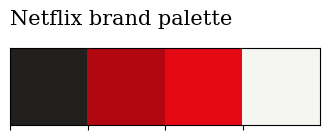

In [15]:
# Add the color palette of their representative color
# Netflix
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

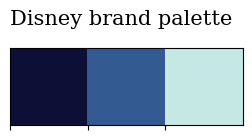

In [16]:
# Disney
sns.palplot(['#0E0F37','#335B92','#C6E8E5'])

plt.title("Disney brand palette ", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

# **Data Visualization**

1. Distribution of Movie and TV show

In [23]:
# Count the values by the type on Netflix
netflix['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

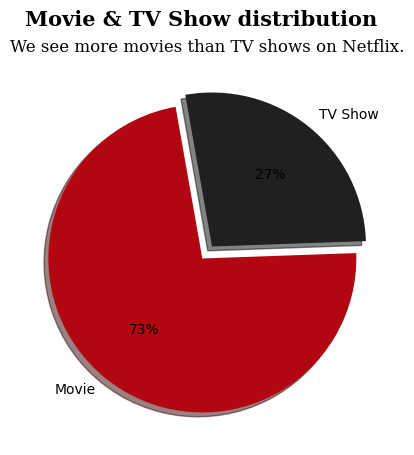

In [24]:
# Making a pie plot
plt.figure(figsize =(5, 5))

plt.pie(ratio.loc['type'], labels=ratio.columns, autopct='%0.f%%', startangle=100,
        explode=[0.05, 0.05], shadow=True, colors=['#b20710', '#221f1f'])

plt.suptitle('Movie & TV Show distribution', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('We see more movies than TV shows on Netflix.', fontfamily='serif', fontsize=12)

plt.show()

In [25]:
# Count the values by the type on Disney Plus
disney['type'].value_counts()

Movie      1051
TV Show     393
Name: type, dtype: int64

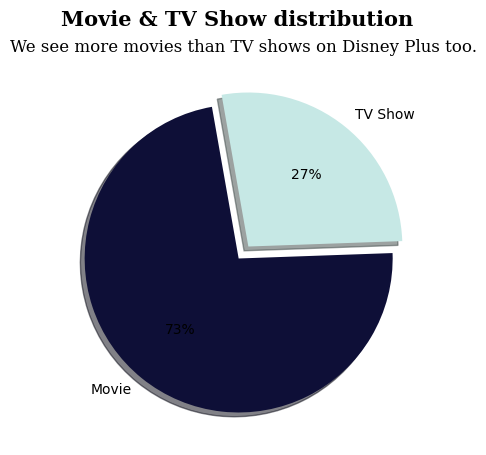

In [22]:
# Make a pie plot
plt.figure(figsize =(5, 5))

plt.pie(ratio.loc['type'], labels=ratio.columns, autopct='%0.f%%', startangle=100,
        explode=[0.05, 0.05], shadow=True, colors=['#0E0F37', '#C6E8E5'])

plt.suptitle('Movie & TV Show distribution', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('We see more movies than TV shows on Disney Plus too.', fontfamily='serif', fontsize=12)

plt.show()

Distribution by year

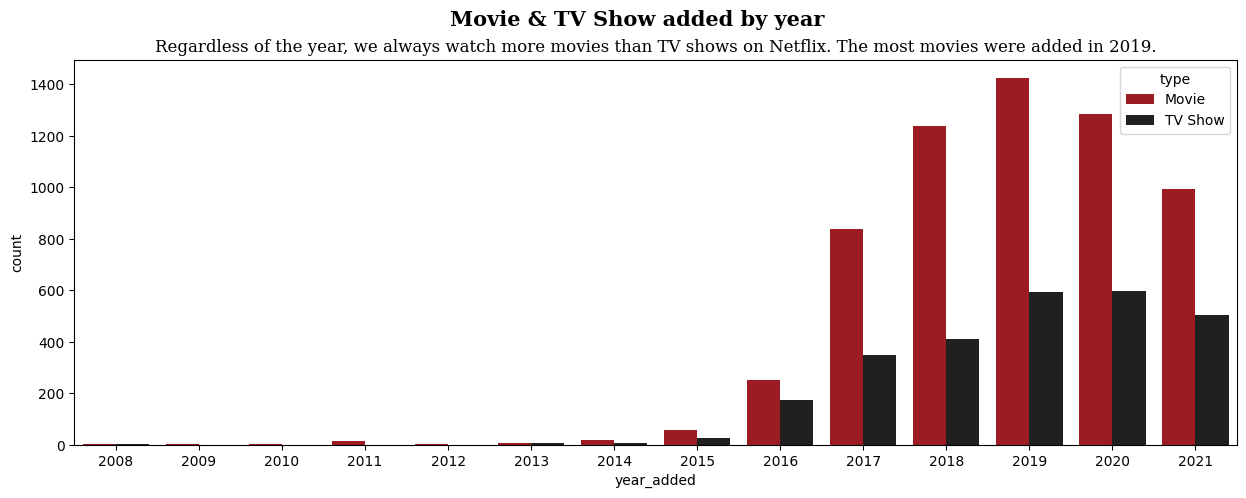

In [27]:
# Bar chart showing the number of contents by year (Netflix)
plt.figure(figsize=(15, 5))

sns.countplot(data=netflix, x='year_added', hue='type', palette=['#b20710', '#221f1f'])

plt.suptitle('Movie & TV Show added by year', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('Regardless of the year, we always watch more movies than TV shows on Netflix. The most movies were added in 2019.', fontfamily='serif', fontsize=12)

plt.show()

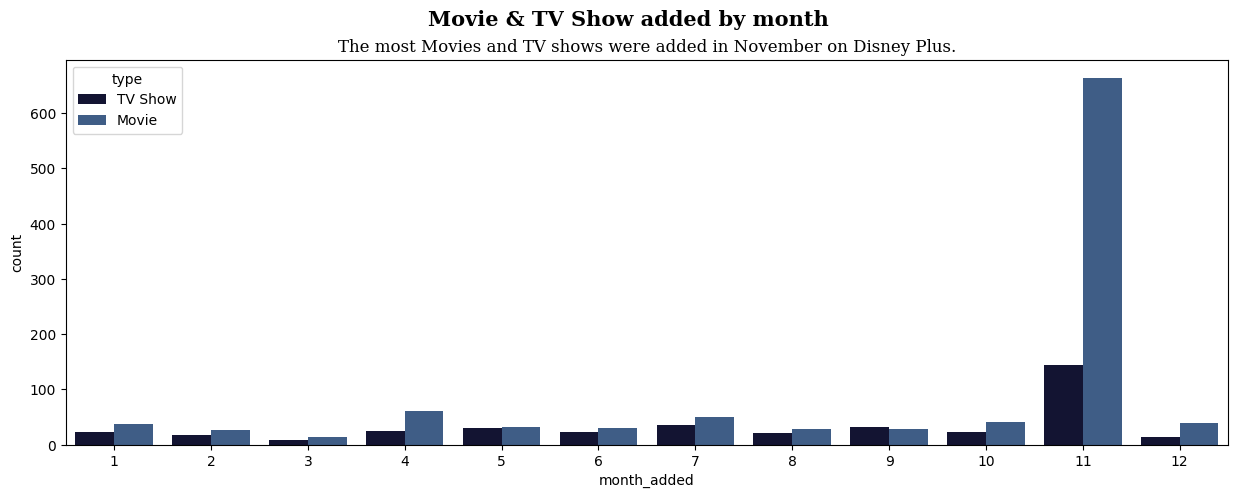

In [29]:
# Bar chart showing the number of contents by month (Disney plus)
plt.figure(figsize=(15, 5))

sns.countplot(data=disney, x='month_added', hue='type', palette=['#0E0F37','#335B92'])

plt.suptitle('Movie & TV Show added by month', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('The most Movies and TV shows were added in November on Disney Plus.', fontfamily='serif', fontsize=12)

plt.show()

In [32]:
# Print the contents number by month on Netflix
netflix_month = netflix.groupby('month_added')['type'].value_counts().unstack()

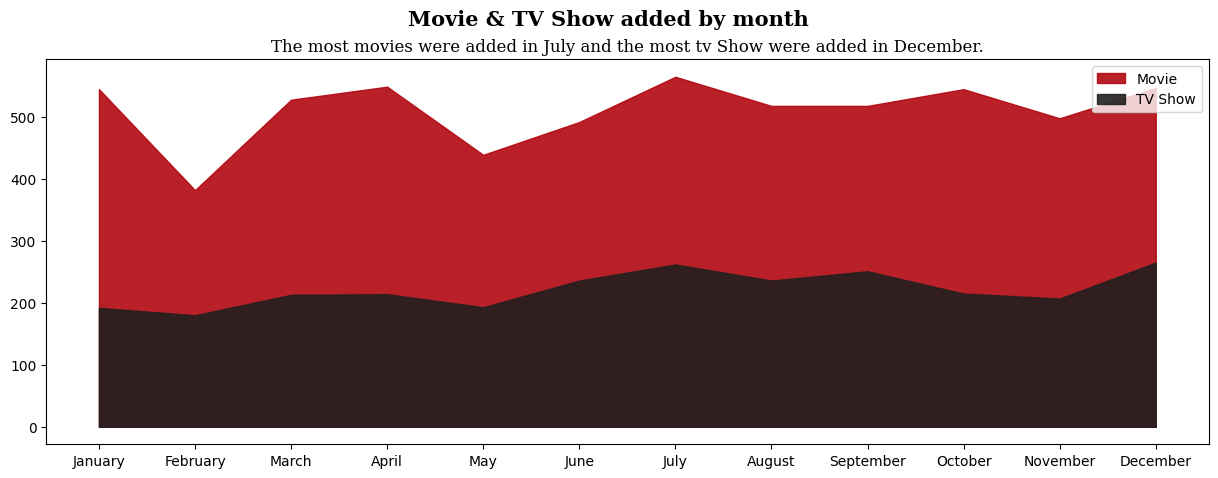

In [33]:
#
plt.figure(figsize=(15, 5))

plt.fill_between(x=netflix_month['Movie'].index, y1=0, y2=netflix_month['Movie'], color='#b20710', alpha=0.9, label = 'Movie')
plt.fill_between(x=netflix_month['TV Show'].index, y1=0, y2=netflix_month['TV Show'], color='#221f1f', alpha=0.9, label = 'TV Show')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           ['January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'])
plt.legend()


plt.suptitle('Movie & TV Show added by month', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('The most movies were added in July and the most tv Show were added in December.', fontfamily='serif', fontsize=12)

plt.show()

In [35]:
# Print the contents number by year on DisneyPlus
disney_year = disney.groupby('year_added')['type'].value_counts().unstack()
disney_year

type,Movie,TV Show
year_added,,
2019,630,135
2020,230,122
2021,191,136


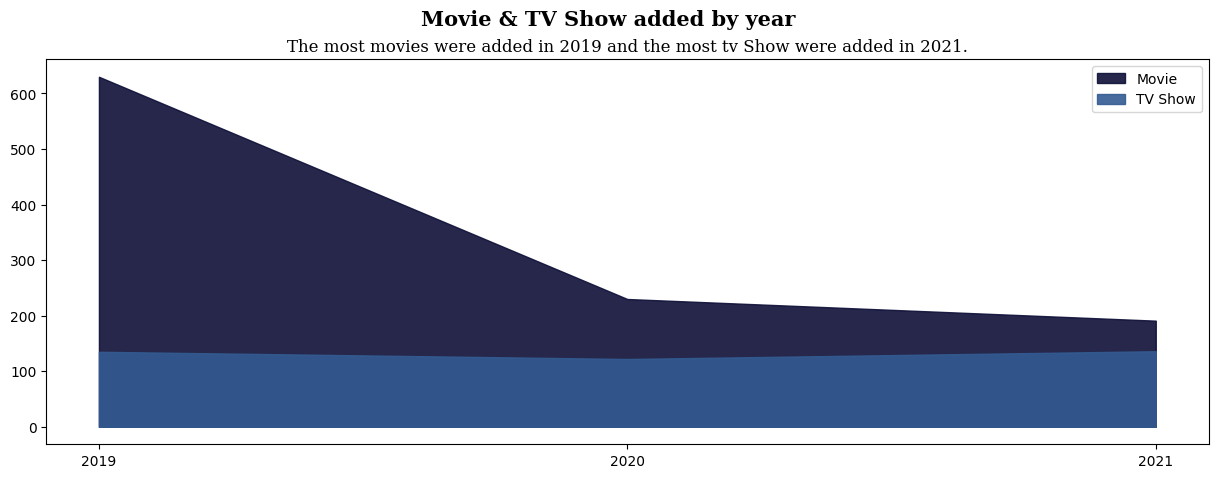

In [40]:
#
plt.figure(figsize=(15, 5))

plt.fill_between(x=disney_year['Movie'].index, y1=0, y2=disney_year['Movie'], color='#0E0F37', alpha=0.9, label = 'Movie')
plt.fill_between(x=disney_year['TV Show'].index, y1=0, y2=disney_year['TV Show'], color='#335B92', alpha=0.9, label = 'TV Show')
plt.xticks([2019, 2020, 2021])
plt.legend()


plt.suptitle('Movie & TV Show added by year', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('The most movies were added in 2019 and the most tv Show were added in 2021.', fontfamily='serif', fontsize=12)

plt.show()

**Heatmap of Target ages**

In [44]:
# Check the data by age_group and country on Netflix
netflix_age_country = netflix.groupby('age_group')['country'].value_counts().unstack()
netflix_age_country

country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
age_group,,,,,,,,,,,,,,,,,,,,,
Adults,NaN,1.0,42.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,...,1.0,1.0,NaN,NaN,1.0,NaN,1.0,3.0,1.0,NaN
Kids,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
Older Kids,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Young Adults,1.0,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN


In [49]:
# Check the data by age_group and country on Disney Plus
disney_age_country = disney.groupby('age_group')['country'].value_counts().unstack()
disney_age_country

country,Argentina,"Argentina, Mexico","Australia, United Kingdom","Australia, United States","Austria, South Africa","Austria, United Kingdom, United States",Canada,"Canada, Malaysia, United States","Canada, United States","Canada, United States, France",...,"United States, Taiwan, China","United States, Taiwan, South Korea, China, Japan, United Kingdom","United States, United Kingdom","United States, United Kingdom, Australia","United States, United Kingdom, Australia, Canada","United States, United Kingdom, Belgium, Canada","United States, United Kingdom, Canada","United States, United Kingdom, Hungary","United States, United Kingdom, South Africa","United States, United Kingdom, South Korea"
age_group,,,,,,,,,,,,,,,,,,,,,
Kids,2.0,1.0,1.0,3.0,NaN,NaN,3.0,1.0,11.0,1.0,...,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Older Kids,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,5.0,NaN,...,NaN,NaN,13.0,3.0,1.0,NaN,1.0,1.0,1.0,NaN
Teens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,4.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN
Young Adults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Numericalization by selecting a specific age targeted by a specific country on Netflix
age_order = ['Kids','Older Kids','Teens','Adults']
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan',
                 'France', 'South Korea', 'Spain', 'Mexico', 'Turkey']

netflix_age_country = netflix_age_country.loc[age_order, country_order]

netflix_age_country.fillna(0, inplace = True)
netflix_age_country

country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Turkey
age_group,,,,,,,,,,
Kids,198.0,14.0,42.0,32.0,3.0,12.0,5.0,3.0,2.0,1.0
Older Kids,515.0,151.0,82.0,40.0,60.0,7.0,23.0,6.0,9.0,9.0
Teens,289.0,4.0,8.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0
Adults,1403.0,253.0,214.0,80.0,87.0,83.0,88.0,122.0,85.0,64.0


In [52]:
# Numericalization by selecting a specific age targeted by a specific country on Disney Plus
age_order = ['Kids','Older Kids','Teens','Young Adults']
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'France']

disney_age_country = disney_age_country.loc[age_order, country_order]

disney_age_country.fillna(0, inplace = True)
disney_age_country

country,United States,India,United Kingdom,Canada,France
age_group,,,,,
Kids,466.0,0.0,5.0,3.0,1.0
Older Kids,447.0,1.0,16.0,2.0,1.0
Teens,48.0,0.0,0.0,0.0,0.0
Young Adults,42.0,1.0,2.0,0.0,0.0


In [47]:
# Add the percentage by age
netflix_age_country = netflix_age_country.div(netflix_age_country.sum(axis=0), axis=1)
netflix_age_country

country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Turkey
age_group,,,,,,,,,,
Kids,0.082328,0.033175,0.121387,0.206452,0.019608,0.116505,0.043103,0.022727,0.020619,0.013514
Older Kids,0.214137,0.357820,0.236994,0.258065,0.392157,0.067961,0.198276,0.045455,0.092784,0.121622
Teens,0.120166,0.009479,0.023121,0.019355,0.019608,0.009709,0.000000,0.007576,0.010309,0.000000
Adults,0.583368,0.599526,0.618497,0.516129,0.568627,0.805825,0.758621,0.924242,0.876289,0.864865


In [53]:
disney_age_country = disney_age_country.div(disney_age_country.sum(axis=0), axis=1)
disney_age_country

country,United States,India,United Kingdom,Canada,France
age_group,,,,,
Kids,0.464606,0.0,0.217391,0.6,0.5
Older Kids,0.445663,0.5,0.695652,0.4,0.5
Teens,0.047856,0.0,0.000000,0.0,0.0
Young Adults,0.041874,0.5,0.086957,0.0,0.0


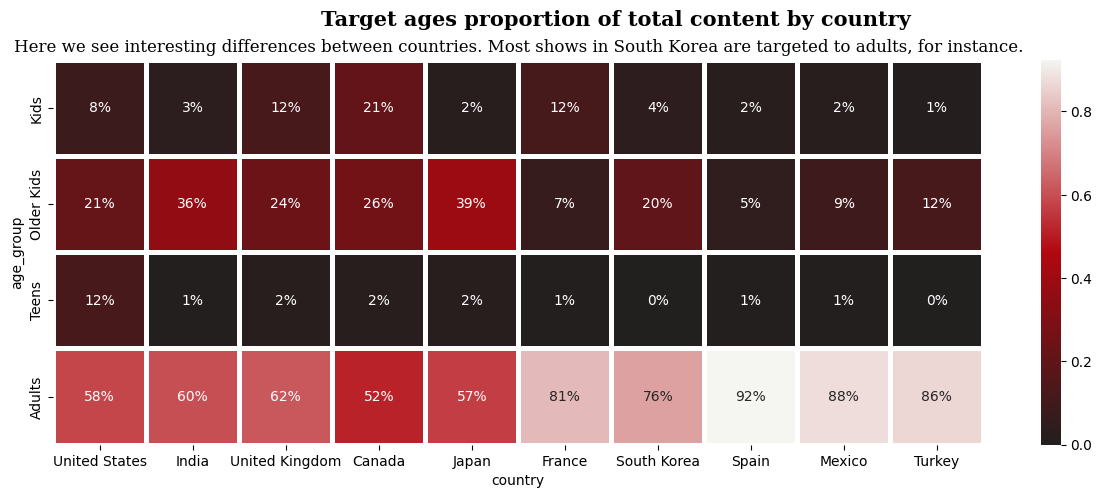

In [54]:
# Making heatmap of target ages proportion by country on Netflix
plt.figure(figsize=(15, 5))

cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

sns.heatmap(netflix_age_country, cmap = cmap, linewidth=2.5, annot=True, fmt='.0%')

plt.suptitle('Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15)
plt.title('Here we see interesting differences between countries. Most shows in South Korea are targeted to adults, for instance.',fontsize=12,fontfamily='serif')

plt.show()

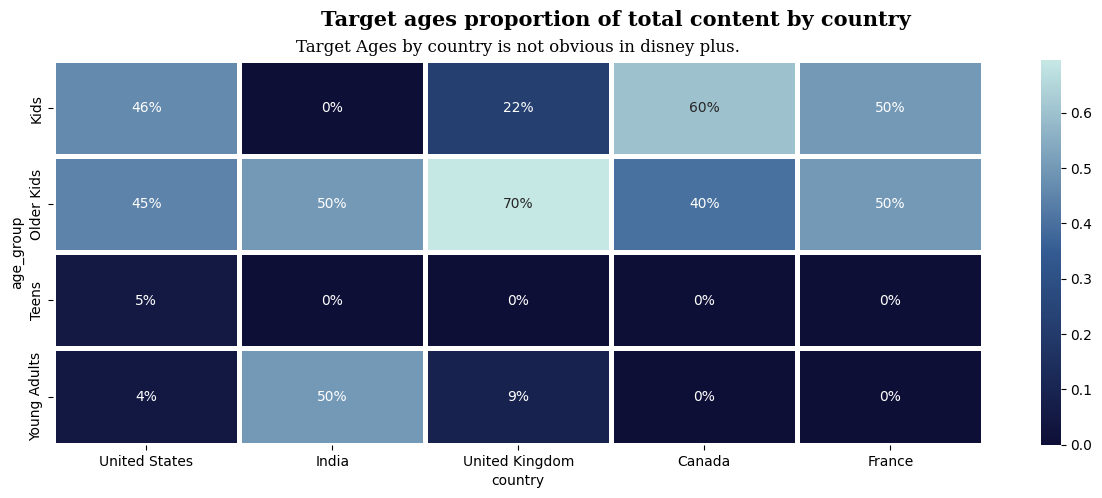

In [56]:
# Making heatmap of target ages proportion by country on Disney
plt.figure(figsize=(15, 5))

cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#0E0F37','#335B92','#C6E8E5'])

sns.heatmap(disney_age_country, cmap = cmap, linewidth=2.5, annot=True, fmt='.0%')

plt.suptitle('Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15)
plt.title('Target Ages by country is not obvious in disney plus.',fontsize=12,fontfamily='serif')

plt.show()

 **Word Cloud**

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

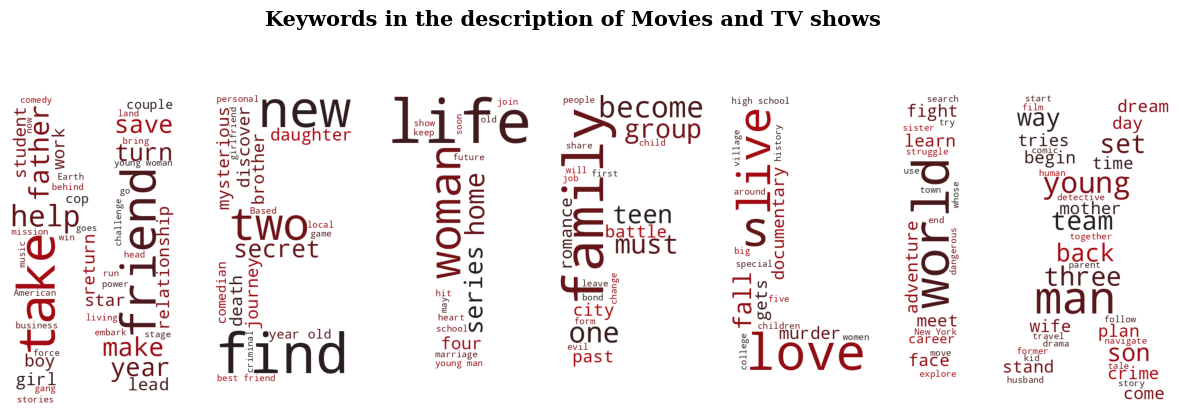

In [57]:
# Create a wordclound in Netflix logo shape
plt.figure(figsize = (15, 5))

text = str(list(netflix['description']))
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/패캠_파이톤/contents/netflix_logo.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

wordcloud = WordCloud(background_color = 'white', width = 1400, height = 1400, max_words = 170, mask = mask, colormap = cmap).generate(text)

plt.suptitle('Keywords in the description of Movies and TV shows', fontweight='bold', fontfamily='serif', fontsize=15)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

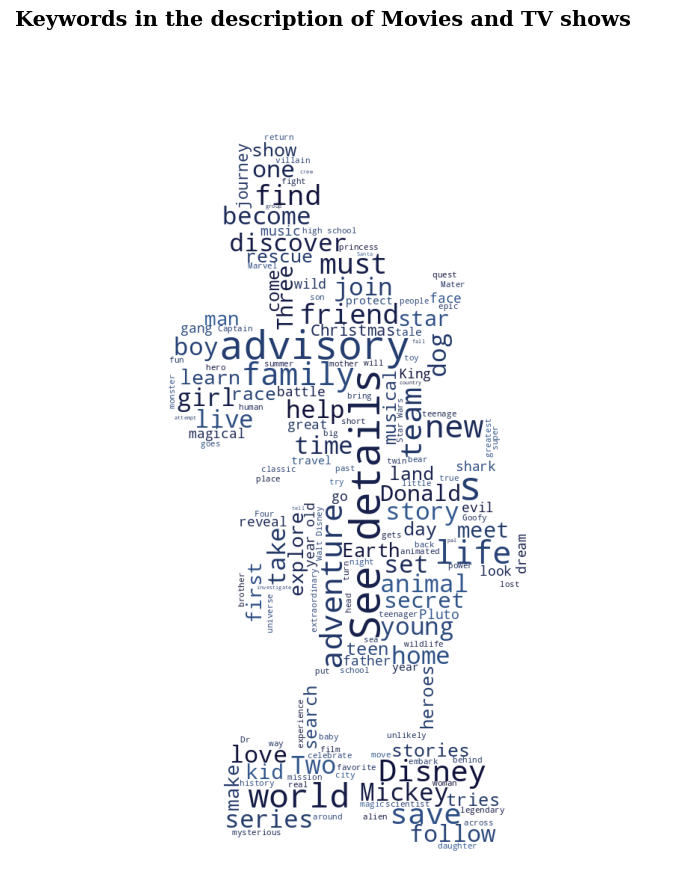

In [58]:
# Create a wordclound in Disney Mickey Mouse shape
plt.figure(figsize = (20, 10))

text = str(list(disney['description']))
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/패캠_파이톤/contents/disney.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#0E0F37','#335B92'])

wordcloud = WordCloud(background_color = 'white', width = 1400, height = 1400, max_words = 170, mask = mask, colormap = cmap).generate(text)

plt.suptitle('Keywords in the description of Movies and TV shows', fontweight='bold', fontfamily='serif', fontsize=15)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()